In [1]:
# Pandas, NumPy, Matplotlib, and Seaborn
import pandas as pd
import numpy as np

# Machine Learning Algorithms and Scaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score

# Warnings
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Data Preprocessing

In [2]:
data = pd.read_excel("train.xlsx")
trial = pd.read_excel("test.xlsx")

In [3]:
train_x = data.drop(['Risk'], axis = 1)
train_y = data['Risk']

In [4]:
test_x = trial.drop(['Risk'], axis = 1)
test_y = trial['Risk']

# Machine Learning Algorithms

We will use the following algorithms:

1. Logistic Regression
2. Decision Tree
3. Random Forest

## Logistic Regression

In [5]:
lr = LogisticRegression()

# Convert feature names in the test dataset to match the case of training data (Error received earlier)
test_x.rename(columns = {'SCORE_A': 'Score_A', 'SCORE_B': 'Score_B'}, inplace = True)

lr_model = lr.fit(train_x, train_y)
y_predlr = lr_model.predict(test_x)

In [6]:
accuracy_lr = accuracy_score(test_y, y_predlr)
f1_lr = f1_score(test_y, y_predlr)
print('Accuracy With Logistic Regression = ', accuracy_lr)
print('F1 Score With Logistic Regression = ', f1_lr)

Accuracy With Logistic Regression =  0.44036697247706424
F1 Score With Logistic Regression =  0.2136279926335175


## Decision Tree Classifier

In [7]:
dt = DecisionTreeClassifier()

dt_model = dt.fit(train_x, train_y)
y_preddt = dt_model.predict(test_x)

In [8]:
accuracy_dt = accuracy_score(test_y, y_preddt)
f1_dt = f1_score(test_y, y_preddt)
print('Accuracy With Decision Tree Classifier = ', accuracy_dt)
print('F1 Score With Decision Tree Classifier = ', f1_dt)

Accuracy With Decision Tree Classifier =  0.7509829619921363
F1 Score With Decision Tree Classifier =  0.7564102564102563


## Random Forest Classifier

In [9]:
rf = RandomForestClassifier()

rf_model = rf.fit(train_x, train_y)
y_predrf = rf_model.predict(test_x)

In [10]:
accuracy_rf = accuracy_score(test_y, y_predrf)
f1_rf = f1_score(test_y, y_predrf)
print('Accuracy With Random Forest Classifier = ', accuracy_rf)
print('F1 Score With Random Forest Classifier = ', f1_rf)

Accuracy With Random Forest Classifier =  0.7509829619921363
F1 Score With Random Forest Classifier =  0.7564102564102563


Since Decison Tree has higher F1 score and accuracy score among all the algorithms used, we will go with Decision Tree Classifier.

In [11]:
# Lets View Our Test and Prediction Data:
pred_data = pd.DataFrame(np.column_stack((y_preddt, test_y)), columns = ['Prediction', 'Test'])
pred_data

,Prediction,Test
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
758,0,0
759,0,0
760,0,0
761,0,0


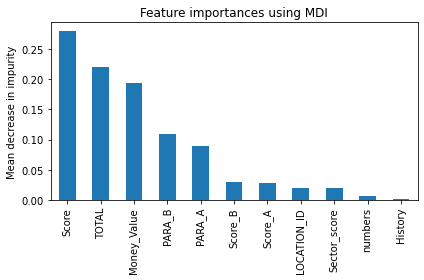

In [12]:
# See what features are the most important for the prediction.
forest_importances = pd.Series(rf.feature_importances_, index=test_x.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Conclusion

In this audit risk prediction project, we embarked on a comprehensive data analysis journey, leveraging various data preprocessing techniques and machine learning algorithms to develop an effective predictive model. 

Our initial steps involved importing essential libraries and loading two datasets, "data" and "trial." Label encoding was applied to convert categorical variables into a numerical format, making them suitable for machine learning algorithms.

We applied three machine learning algorithms: Logistic Regression, Decision Tree Classifier, and Random Forest Classifier. Among these, the Decision Tree Classifier demonstrated the best performance, exhibiting high accuracy and F1 score. To further enhance model performance, we introduced standard scaling to our data, resulting in improved accuracy and F1 score metrics.

In conclusion, this project highlights the significance of data preprocessing and feature engineering in the development of a robust predictive model for audit risk assessment. The Decision Tree Classifier, when combined with appropriate feature selection and scaling, emerged as the most effective approach for this specific task. Nevertheless, continuous optimization and fine-tuning remain essential to meet evolving requirements and ensure the model's reliability in real-world audit risk prediction scenarios.